<a href="https://colab.research.google.com/github/Kaushal-Top5699/TF_CNN_Multiclass_Classification/blob/main/TF_CNN_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-class classification using CNN and Tensorflow**

1. Become one with data.
2. Preprocess the data (get itt ready for the model).
3. Create the model (start with the baseline).
4. Fit the model (overfit it to make sure it works).
5. Evaluate the model.
6. Adjust the different hyperparameters and try to improve the model.
7. Repeat until satisfied.

We just learned the binary classification problem, now lets get started with multi-class classification problem. (Total Classes: 10)

### **1. Import and become one with data.**

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip data.
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-31 03:43:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.207, 108.177.127.207, 172.217.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  40.8MB/s    in 13s     

2023-10-31 03:43:28 (38.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
# Walk through 10 classes of food.
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 10 directories and 0 images in 10_fo

### **2. Data Pre-Processing.**

In [5]:
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Setting up the train and test directories.
# Preprocess Data (get all of pixel values between 0 and 1), this is scaling or normalising.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories.
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Let's get the class names.
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
# Lets visualize our images.
def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path.
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot it.
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {image.shape}")
  return image

['2211675.jpg']
Image Shape: (512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

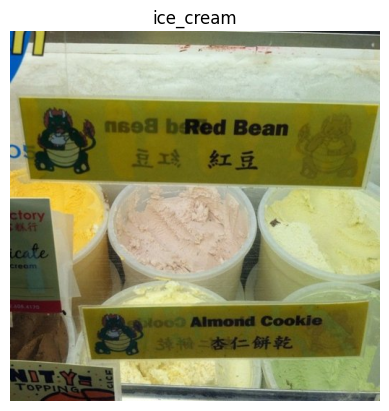

In [10]:
# Get class names programmatically.
# Get a random image.
import pathlib
import matplotlib.image as mpimg
import random

img = view_random_image(train_dir, target_class = random.choice(class_names))
plt.imshow(img)
plt.axis(False)

**We can start our experiment with non-augmented data.**

In [11]:
# Load in our images from directories and turn them into batches.
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = (224, 224),
                                              class_mode = "categorical",
                                              batch_size = 32)

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size = (224, 224),
                                              class_mode = "categorical",
                                              batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### **3. Creating a baseline model.**

In [15]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [16]:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 129ms/step - loss: 2.1555 - accuracy: 0.2057 - val_loss: 2.0634 - val_accuracy: 0.2448
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.8671 - accuracy: 0.3491 - val_loss: 1.9071 - val_accuracy: 0.3368
Epoch 3/5
235/235 [==============================] - 28s 120ms/step - loss: 1.2632 - accuracy: 0.5781 - val_loss: 2.2038 - val_accuracy: 0.2944
Epoch 4/5
235/235 [==============================] - 30s 127ms/step - loss: 0.5694 - accuracy: 0.8199 - val_loss: 3.0160 - val_accuracy: 0.2760
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 0.1772 - accuracy: 0.9511 - val_loss: 4.5624 - val_accuracy: 0.2476


### **5. Evaluate the model.**

In [17]:
# Evaluating Model_1 on test data.
model_1.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 4.5624 - accuracy: 0.2476


[4.562417030334473, 0.2476000040769577]

In [18]:
# Plotting validation and training curves seperatly.
def plot_loss_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss.
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy.
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

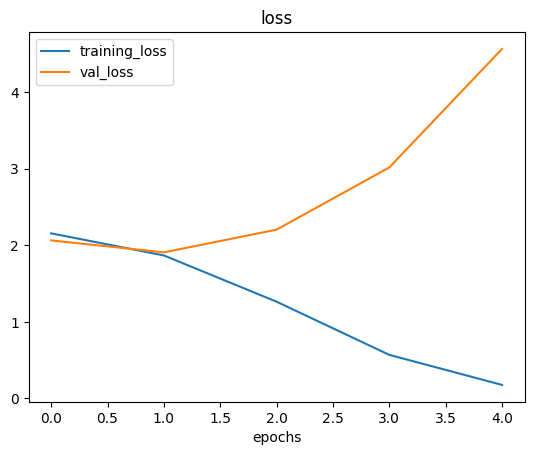

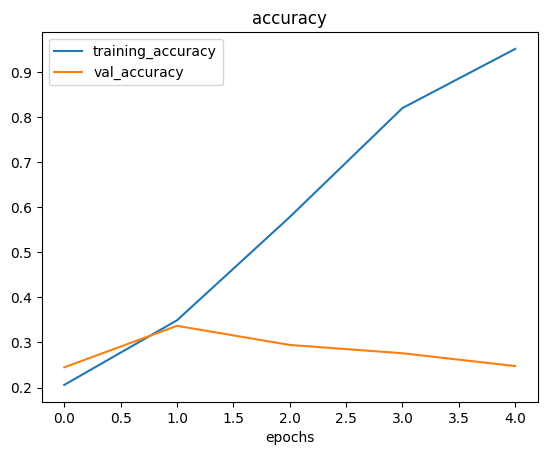

In [19]:
plot_loss_curve(history_1)

### If we take a look at the loss/accuracy curves, we can see that for validation data loss is increasing sharply and accuracy is dropping sharply. This means that our model is overfitting, here are few steps we can take to overcome overfitting,

1. **GET MORE DATA** : As name suggests, add more training data.
2. **SIMPLIFY THE MODEL** : Model might be too complex, therefore, we cann always reduce the number of layers, nuerons, activations etc. Basically, tuning hyperparameters.
3. **DATA AUGMENTATION** : Data augmentation manipulates the training data such that it adds more diversity to it.
4. **TRANSFER LEARNING** : Trasnfer learning laverages the patterns learned by another model on similar data to you own data and allows you to use those patterns on your own dataset.

In [ ]:
# Let's try to simplify our model.